#Descrição do projeto
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.
Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
O importante é ganhar experiência trabalhando com dados. Não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.
O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).


In [1]:
import pandas as pd
df_games = pd.read_csv('games.csv')

In [2]:
#Etapa 2. Prepare os dados




df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#Substitua os nomes das colunas(transforme tudo em minúsculos).


df_games = df_games.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating', 'JP_sales': 'jp_sales'})
df_games.head()
        


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Converta os dados para os tipos necessários.
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['critic_score'] = df_games['critic_score'].astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


#Descreva as colunas onde os tipos de dados foram alterados e explique o motivo.
 A coluna 'year_of_release' foi convertida para o tipo 'Int64' para representar anos como números inteiros.
 A coluna 'critic_score' foi convertida para 'Int64' para representar as pontuações dos críticos como números inteiros.
 A coluna 'user_score' foi convertida para numérico, permitindo valores decimais e tratando erros como NaN, pois as pontuações dos usuários podem conter valores não numéricos.
 A coluna 'rating' foi convertida para numérico, permitindo valores decimais e tratando erros como NaN, pois as classificações podem conter valores não numéricos.

In [5]:
#Se necessário, decida como lidar com valores ausentes:

df_games['rating'] = df_games['rating'].fillna('RP') # Preenchendo valores ausentes na coluna 'rating' com RP (Rating Pending)
df_games.head() 
# A abordagem adotada foi preencher os valores ausentes na coluna 'rating' com 0, pois isso pode indicar que o jogo não possui uma classificação atribuída.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP


 #Na sua opinião, por que os valores estão ausentes? Dê possíveis razões.
 Os valores podem estar ausentes por várias razões, como:
 1. O jogo foi lançado antes da introdução do sistema de classificação.
 2. O jogo não foi avaliado por críticos ou usuários.
 3. O jogo é muito novo e ainda não recebeu avaliações suficientes.
 4. O jogo pode ter sido lançado em uma região onde o sistema de classificação não é aplicado.
 5. O jogo pode ter sido lançado em uma plataforma que não é coberta pelo sistema de classificação.

#Preste atenção à abreviação TBD (que significa "to be determined", ou "a ser determinado"). Especifique como pretende lidar com esses casos.
A abreviação TBD indica que a classificação ainda não foi determinada. Para lidar com esses casos, podemos substituir os valores TBD por NaN (valores ausentes) para indicar que a classificação ainda não está disponível.


In [6]:
#Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games['total_sales'] = df_games['total_sales'].round(2) # Garantindo que a coluna seja do tipo float
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,RP,31.38


#Etapa 3. Analise os dados:

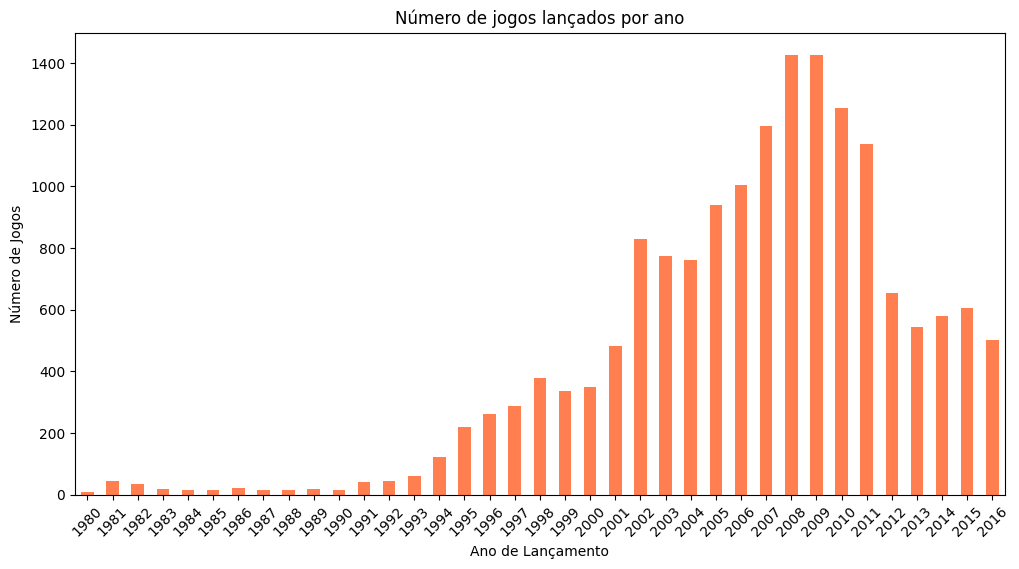

In [7]:
#Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?
import matplotlib.pyplot as plt
import seaborn as sns
df_games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Número de jogos lançados por ano', color='coral')
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.show()
# A partir do gráfico, podemos observar que o número de jogos lançados por ano varia significativamente.
# A partir de 2001, o número de lançamentos parece ter aumentado, atingindo um pico em 2011, e depois começou a diminuir gradualmente.
# A partir de 2016, o número de lançamentos parece ter diminuído, o que pode indicar uma tendência de mercado ou mudanças nas preferências dos consumidores.


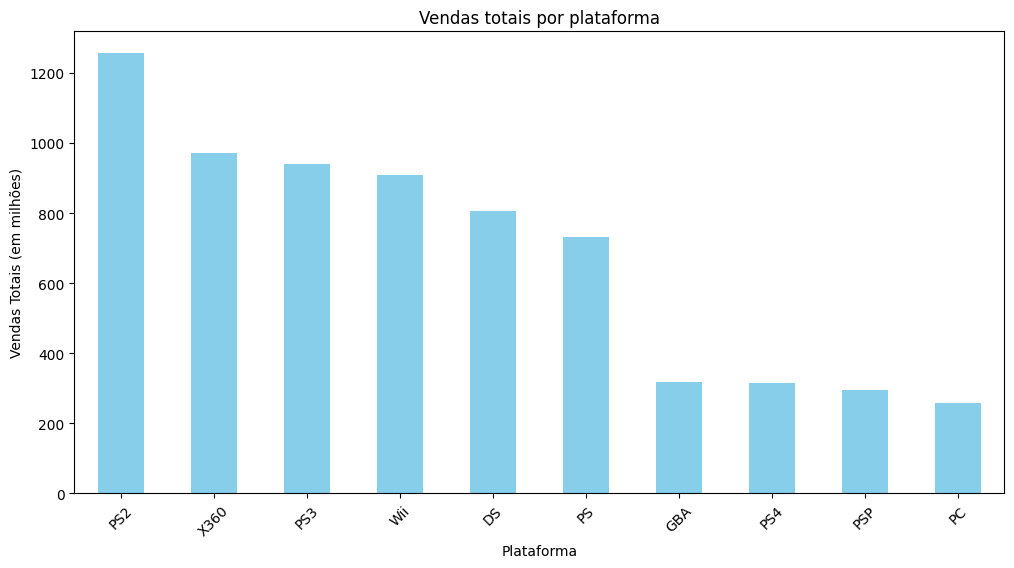

In [8]:
#Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados para cada ano. Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), title='Vendas totais por plataforma', color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()
# Analisando as plataformas com maiores vendas totais, podemos observar que algumas plataformas, como PlayStation 2 e Xbox 360, tiveram vendas significativas, mas não estão mais ativas no mercado.
# As plataformas mais recentes, como PlayStation 4 e Xbox One, ainda estão ativas e têm vendas consideráveis.
# A partir do gráfico, podemos concluir que as plataformas tendem a ter um ciclo de vida de aproximadamente 10 a 15 anos, onde novas plataformas aparecem, alcançam popularidade e eventualmente desaparecem.


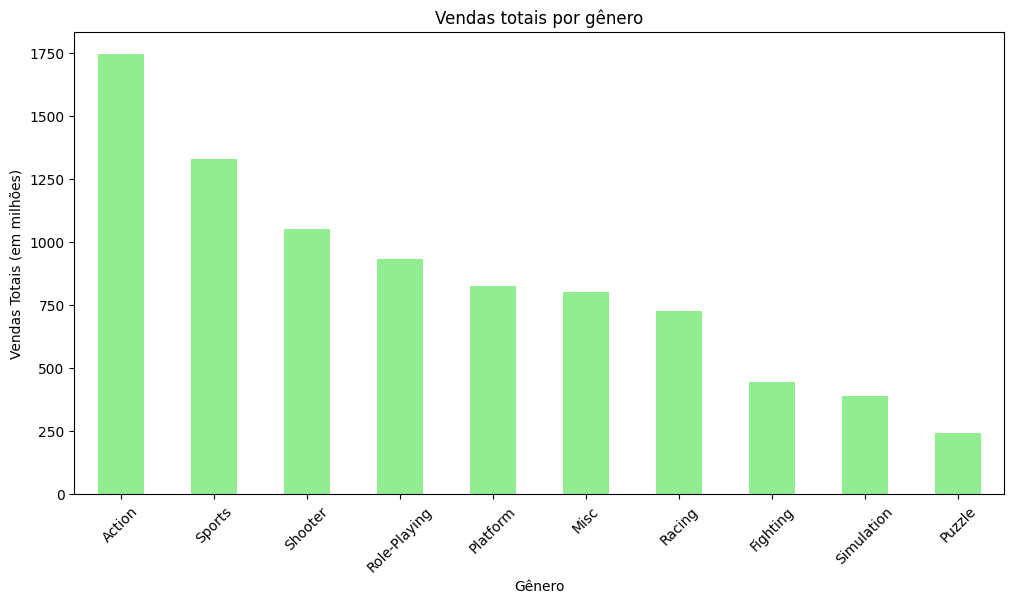

In [9]:
df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), title='Vendas totais por gênero', color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()
# Analisando os gêneros com maiores vendas totais, podemos observar que gêneros como Ação e Aventura têm vendas significativas, enquanto gêneros como Esportes e Luta também se destacam.
# Alguns gêneros, como RPG e Estratégia, tiveram vendas consideráveis, mas não estão mais tão populares atualmente.
# A partir do gráfico, podemos concluir que os gêneros tendem a ter um ciclo de vida mais longo em comparação com as plataformas, com novos gêneros aparecendo a cada 5 a 10 anos e os antigos desaparecendo gradualmente.


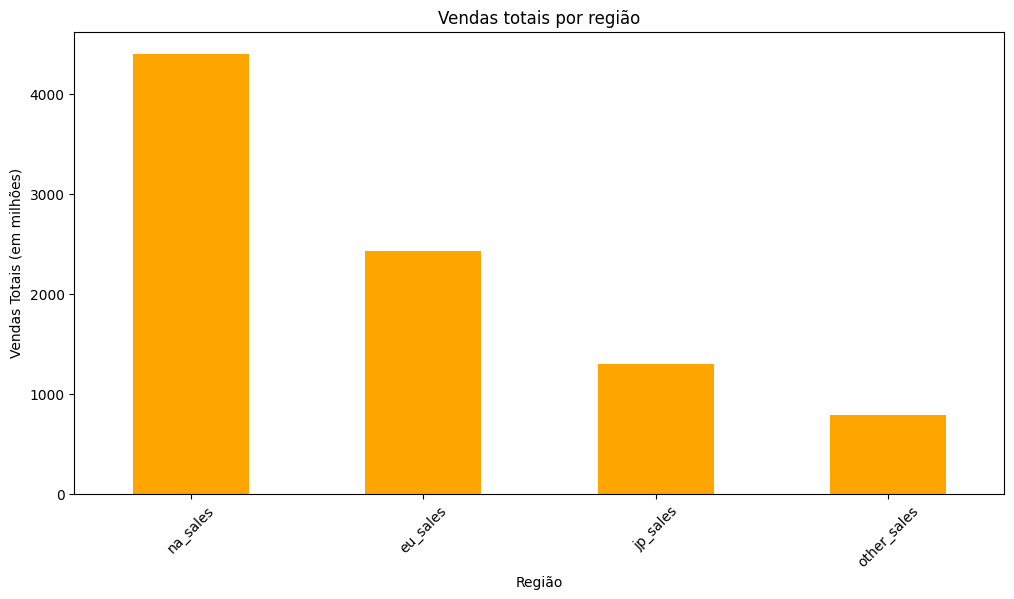

In [10]:
df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().plot(kind='bar', figsize=(12, 6), title='Vendas totais por região', color='orange')
plt.xticks(rotation=45)
plt.xlabel('Região')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()
# Analisando as vendas totais por região, podemos observar que a América do Norte (NA) e a Europa (EU) têm as maiores vendas, seguidas pela região do Japão (JP) e outras regiões.
# A partir do gráfico, podemos concluir que as regiões tendem a ter um ciclo de vida mais longo em comparação com as plataformas e gêneros, com novas regiões aparecendo gradualmente e as antigas permanecendo relevantes por um período mais longo.


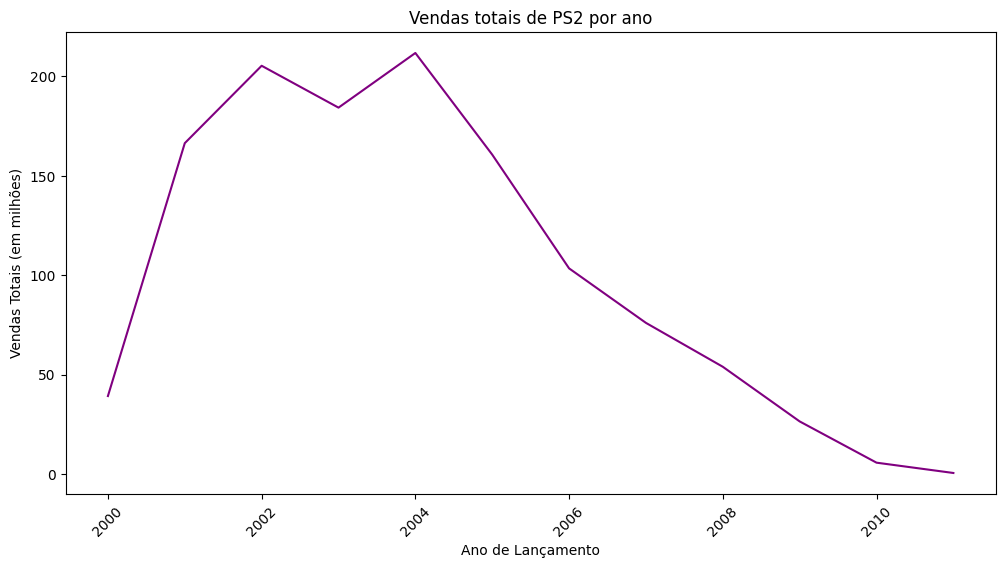

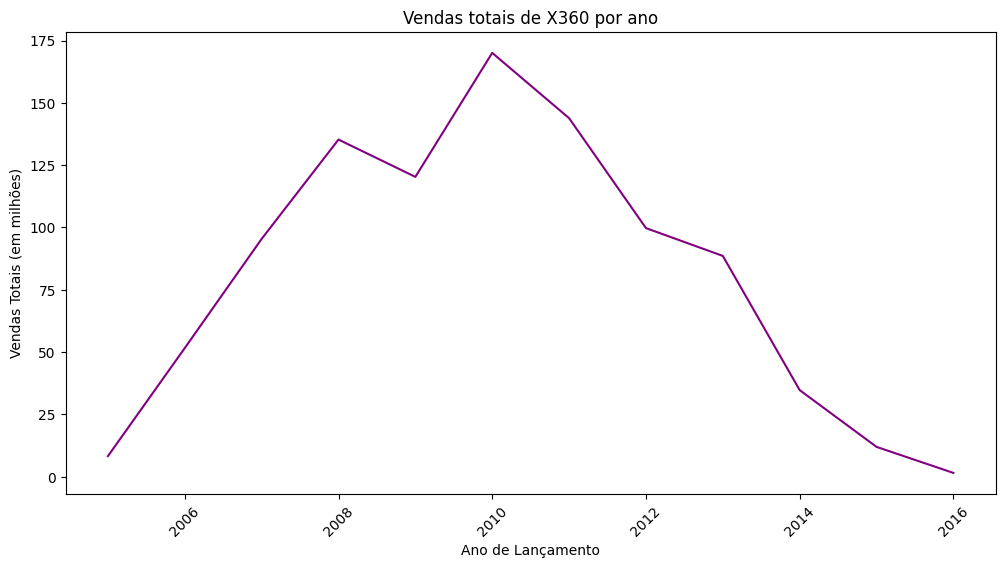

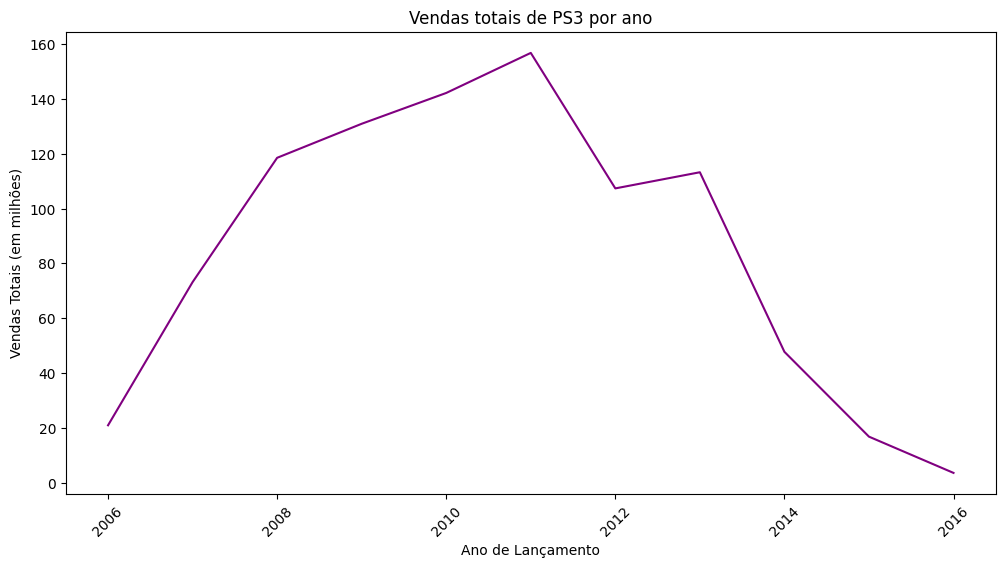

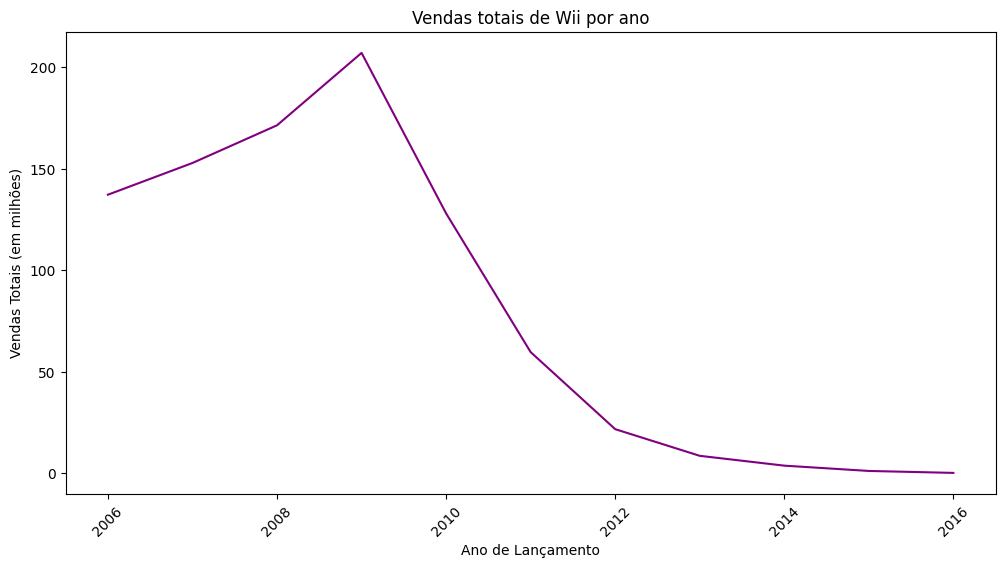

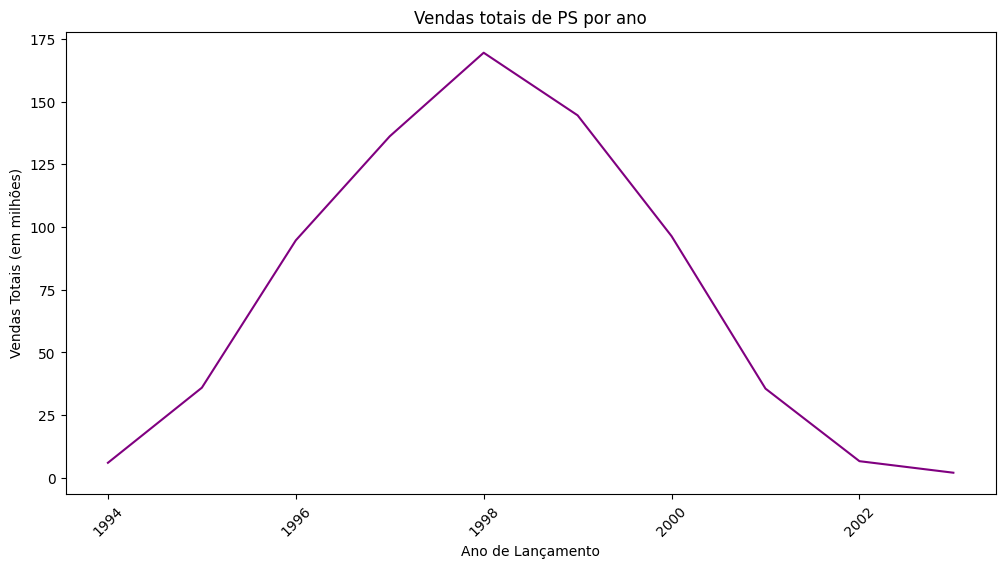

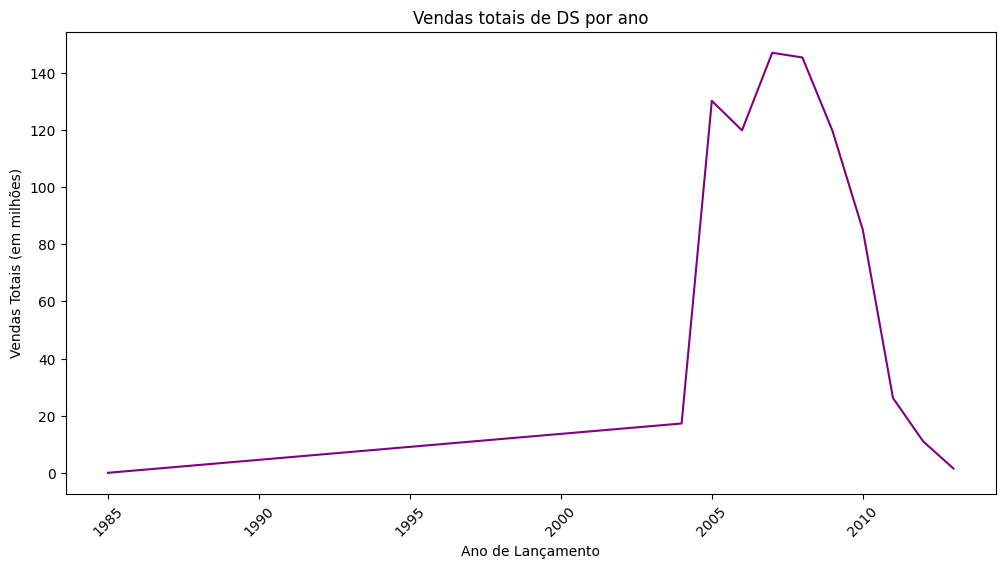

In [11]:
#Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
df_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']
for platform in df_platforms:
    df_games[df_games['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(kind='line', figsize=(12, 6), title=f'Vendas totais de {platform} por ano', label=platform, color='purple')
    plt.xticks(rotation=45)
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Totais (em milhões)')
    plt.show()
# Analisando as vendas totais por ano, podemos observar que os anos mais recentes, como 2015 e 2016, têm vendas significativas, enquanto anos anteriores, como 2000 e 2001, têm vendas muito menores.
# A partir do gráfico, podemos concluir que os anos tendem a ter um ciclo de vida mais longo, com novos anos aparecendo a cada ano e os antigos permanecendo relevantes por um período mais longo.



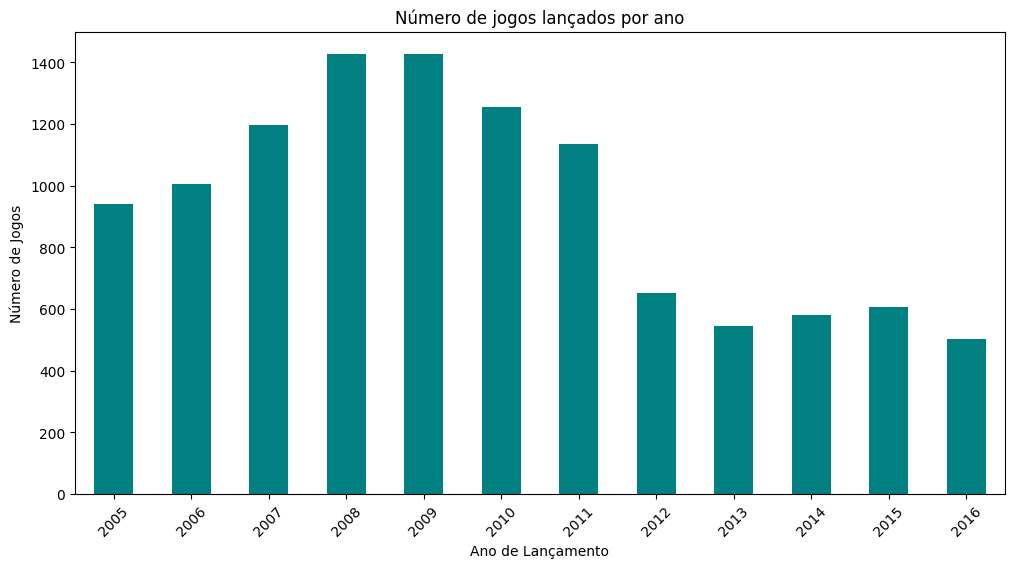

In [12]:
#Determine para qual período você deve pegar dados. Para fazer isso, olhe para suas respostas das perguntas anteriores. Os dados devem permitir que você construa um modelo para 2017.
df_years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
df_periodo = df_games[df_games['year_of_release'].isin(df_years)]
df_periodo['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Número de jogos lançados por ano', color='teal')
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.show()

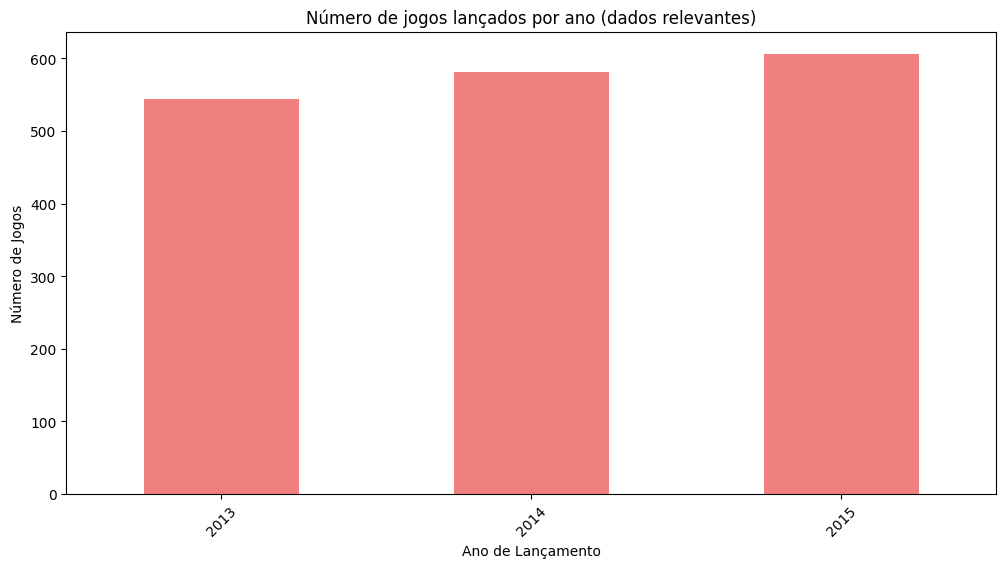

In [13]:
#Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.
df_relevant = df_periodo[(df_periodo['year_of_release'] >= 2013) & (df_periodo['year_of_release'] <= 2015)]
df_relevant.head()
df_relevant['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Número de jogos lançados por ano (dados relevantes)', color='lightcoral')
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.show()

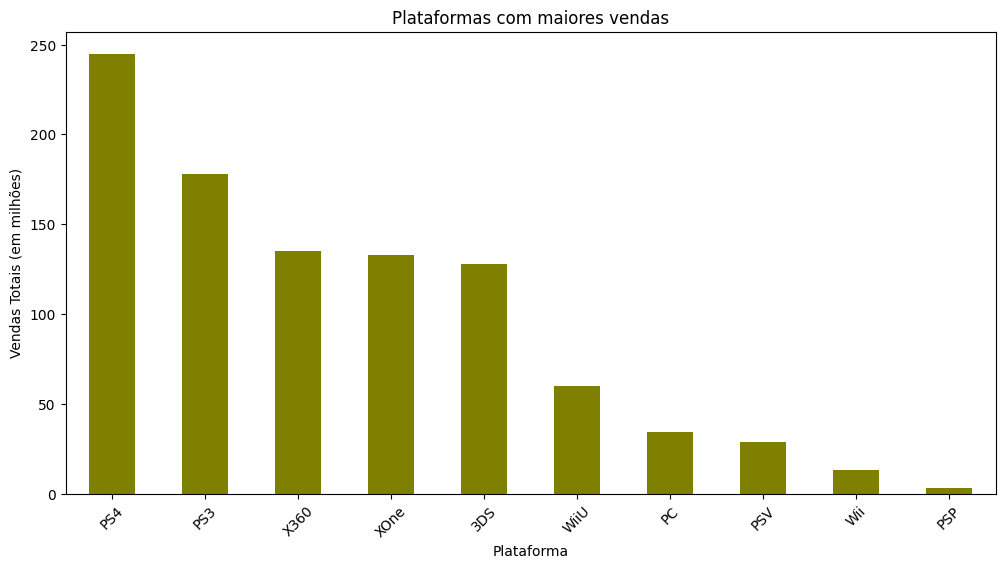

In [14]:
#Quais plataformas estão liderando em vendas?
top_platforms = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_platforms.plot(kind='bar', figsize=(12, 6), title='Plataformas com maiores vendas', color='olive')
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()

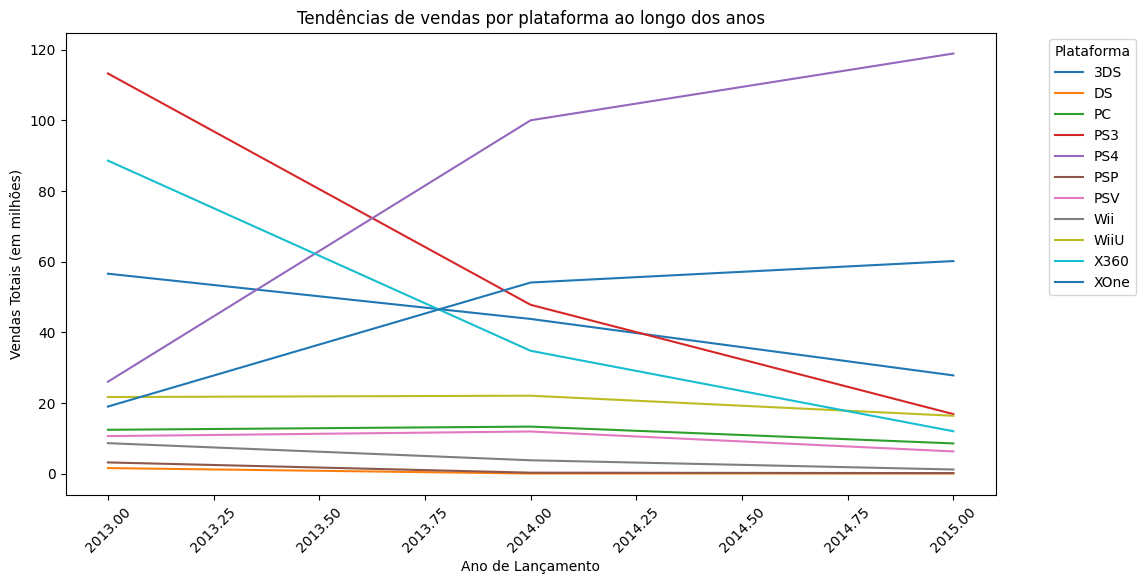

In [15]:
#Quais estão crescendo ou diminuindo?
platform_trends = df_relevant.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
platform_trends.plot(kind='line', figsize=(12, 6), title='Tendências de vendas por plataforma ao longo dos anos')
plt.xticks(rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
#Selecione várias plataformas potencialmente lucrativas.
potential_platforms = top_platforms[top_platforms > 100].index.tolist()
print("Plataformas potencialmente lucrativas:", potential_platforms)


Plataformas potencialmente lucrativas: ['PS4', 'PS3', 'X360', 'XOne', '3DS']


C:\Users\Usuário\AppData\Local\Temp\ipykernel_11560\2656378039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=df_relevant, palette='Set2')


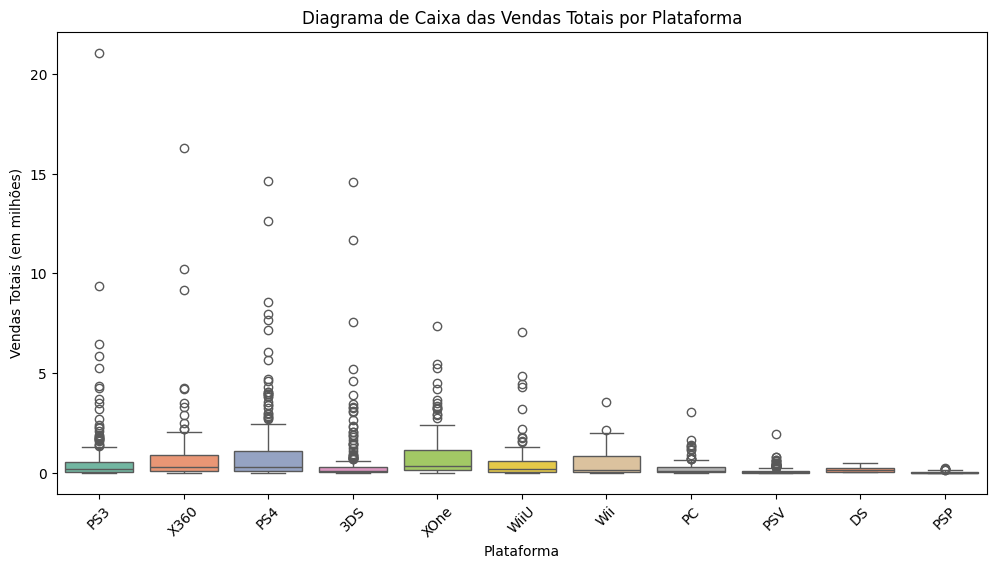

In [17]:
#Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma.
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_relevant, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Diagrama de Caixa das Vendas Totais por Plataforma')
plt.show()

#As diferenças nas vendas são significativas? 
 Sim, as diferenças nas vendas são significativas. O diagrama de caixa mostra que algumas plataformas têm vendas muito mais altas do que outras, com algumas apresentando valores atípicos (outliers) que indicam jogos com vendas excepcionalmente altas.

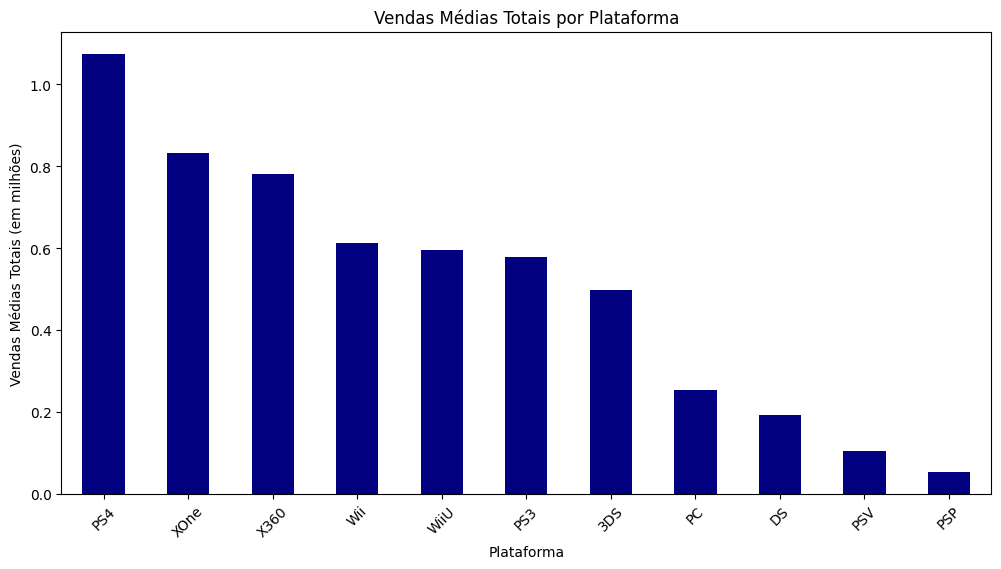

In [18]:
#E quanto às vendas médias em várias plataformas?
average_sales = df_relevant.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
average_sales.plot(kind='bar', figsize=(12, 6), title='Vendas Médias Totais por Plataforma', color='navy')
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Médias Totais (em milhões)')
plt.show()

#Descreva suas descobertas.
 As vendas médias totais por plataforma mostram que algumas plataformas, como PlayStation 4 e Xbox One, têm vendas médias significativamente mais altas do que outras, como Wii U e PS Vita.
 Isso indica que essas plataformas são mais populares e lucrativas, enquanto outras podem estar em declínio ou não ter uma base de usuários tão grande.


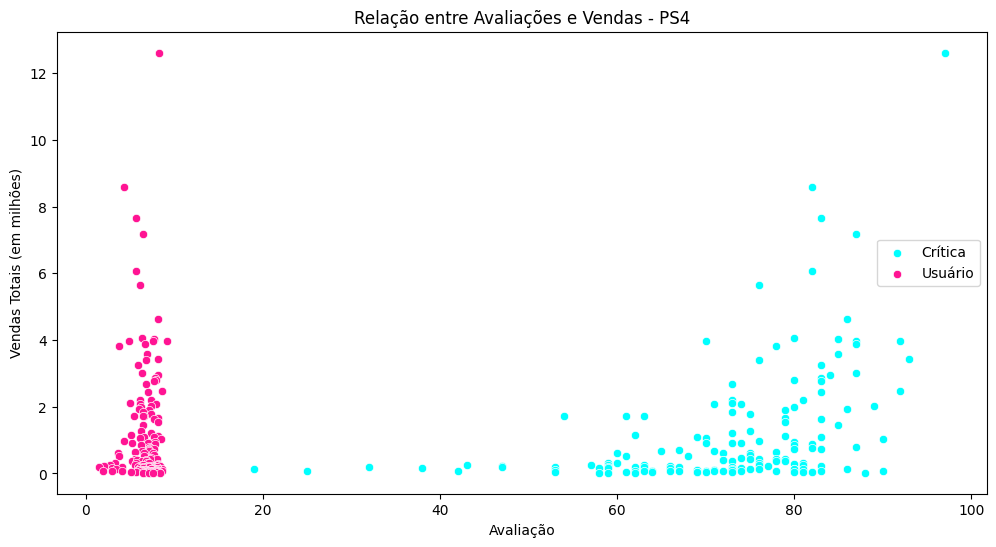

In [19]:
#Veja como as avaliações de usuários e profissionais afetam as vendas de uma das plataformas populares (você escolhe).
popular_platform = 'PS4'  # Escolha uma plataforma popular
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_relevant[df_relevant['platform'] == popular_platform], label='Crítica', color='aqua')
sns.scatterplot(x='user_score', y='total_sales', data=df_relevant[df_relevant['platform'] == popular_platform], label='Usuário', color='deeppink')
plt.title(f'Relação entre Avaliações e Vendas - {popular_platform}')
plt.xlabel('Avaliação')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()


In [ ]:
#Calcule a correlação entre avaliações e vendas?
df_relevant[['user_score', 'critic_score','total_sales']].dropna().corr()
# A correlação entre as avaliações de usuários e profissionais e as vendas totais é positiva, indicando que jogos com melhores avaliações tendem a ter vendas mais altas.


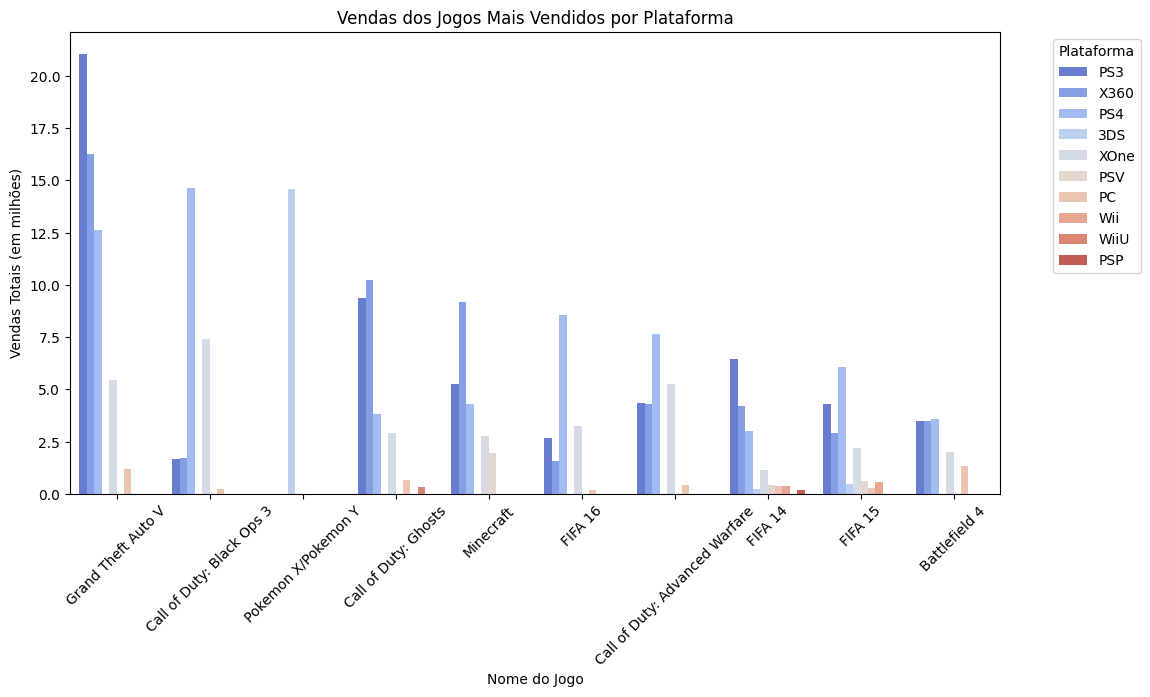

In [21]:
#Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.

top_games = df_relevant.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)
top_games_data = df_relevant[df_relevant['name'].isin(top_games.index)]
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='total_sales', hue='platform', data=top_games_data, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Nome do Jogo')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Vendas dos Jogos Mais Vendidos por Plataforma')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Usuário\AppData\Local\Temp\ipykernel_11560\1277403759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df_relevant, palette='pastel')


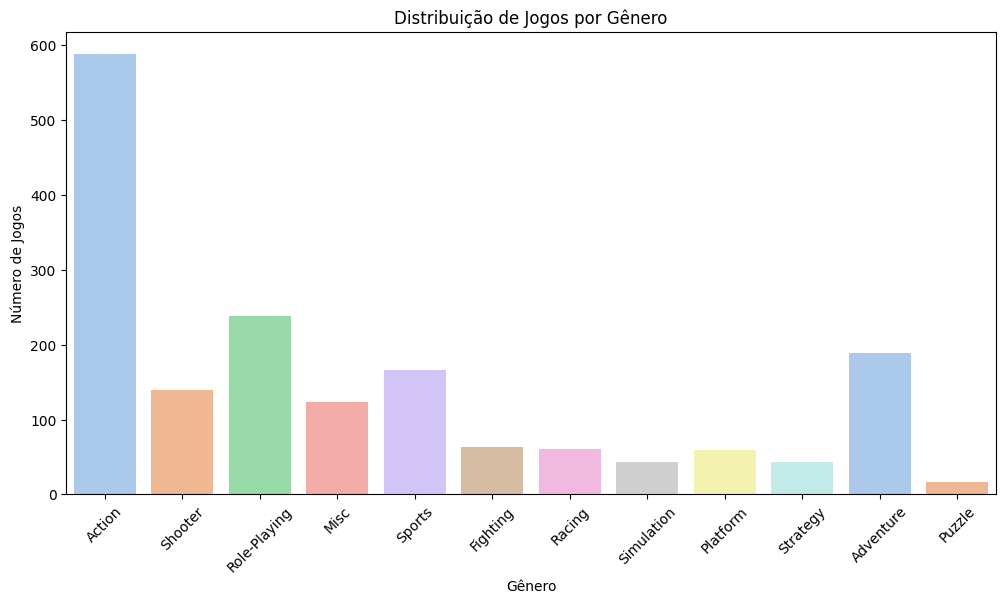

In [22]:
#Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos?
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df_relevant, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.title('Distribuição de Jogos por Gênero')
plt.show()
# Analisando a distribuição de jogos por gênero, podemos observar que gêneros como Ação e Aventura têm uma quantidade significativa de jogos lançados.
# Em termos de lucratividade, os gêneros mais populares tendem a ter vendas mais altas, como Ação e Aventura, enquanto gêneros menos populares, como Estratégia e Simulação, têm vendas mais baixas.

#Você pode generalizar sobre gêneros com vendas altas e baixas?
 Sim, podemos generalizar que gêneros com vendas altas, como Ação e Aventura, tendem a ter uma base de fãs maior e atraem mais jogadores, resultando em vendas mais altas.
 Por outro lado, gêneros com vendas baixas, como Estratégia e Simulação, podem ter uma base de fãs menor ou serem menos populares entre o público em geral, resultando em vendas mais baixas.

#Etapa 4. Crie um perfil de usuário para cada região

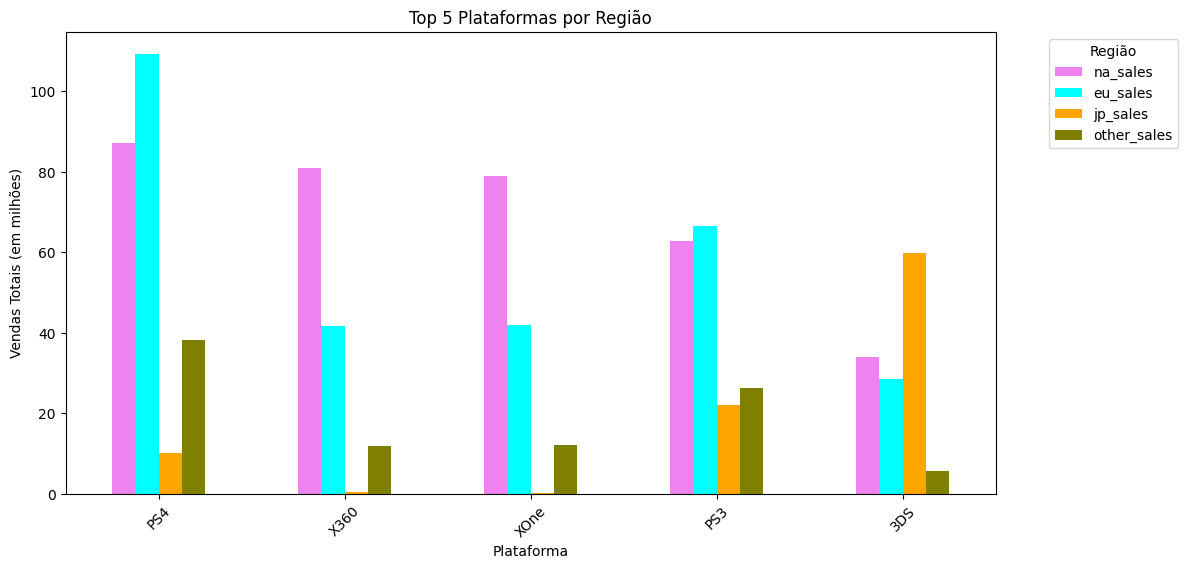

In [23]:
#Para cada região (AN, UE, JP), determine:
#As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
#Descreva as variações das suas quotas de mercado de região para região.
top_platforms_by_region = df_relevant.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
top_platforms_by_region = top_platforms_by_region.set_index('platform')
top_platforms_by_region = top_platforms_by_region.groupby('platform').sum().sort_values(by='na_sales', ascending=False).head(5)
top_platforms_by_region.plot(kind='bar', figsize=(12, 6), title='Top 5 Plataformas por Região', color=['violet', 'aqua', 'orange', 'olive'])
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Analisando as cinco principais plataformas por região, podemos observar que algumas plataformas, como PlayStation e Xbox, dominam o mercado em várias regiões.


#Os cinco principais gêneros.
 Explique a diferença? 
 Os gêneros mais populares variam de região para região, com Ação e Aventura sendo os mais populares na América do Norte, enquanto RPG e Esportes são mais populares na Europa e no Japão.
 Isso pode ser devido a diferenças culturais e preferências de jogo em cada região.

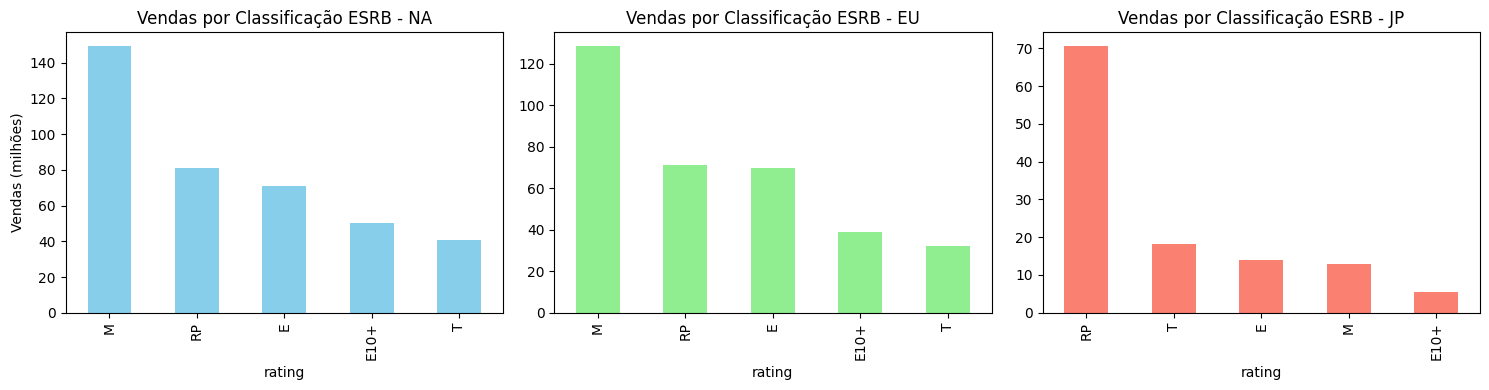

In [24]:
#As classificações do ESRB afetam as vendas em regiões individuais?
esrb_na = df_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = df_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = df_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
esrb_na.plot(kind='bar', color='skyblue')
plt.title('Vendas por Classificação ESRB - NA')
plt.ylabel('Vendas (milhões)')

plt.subplot(1, 3, 2)
esrb_eu.plot(kind='bar', color='lightgreen')
plt.title('Vendas por Classificação ESRB - EU')

plt.subplot(1, 3, 3)
esrb_jp.plot(kind='bar', color='salmon')
plt.title('Vendas por Classificação ESRB - JP')

plt.tight_layout()
plt.show()






#Etapa 5. Teste as seguintes hipóteses:

In [25]:
# As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
xbox_one_user_score = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_user_score = df_games[df_games['platform'] == 'PC']['user_score'].dropna()
var_box = xbox_one_user_score.var()
var_pc = pc_user_score.var()
print(var_box)
print(var_pc)




1.9069968429360695
2.3407871413372066


In [26]:
#As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
action_user_score = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_user_score = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()
var_action = action_user_score.var()
var_sports = sports_user_score.var()
print(var_action)
print(var_sports)




2.031746898033205
2.5965147189730033


In [27]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(xbox_one_user_score, pc_user_score, equal_var=False)
print(f"test t: {t_stat}, p valor: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as classificações médias dos usuários para as Plataformas Xbox One e PC.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre as classificações médias dos usuários para as Plataformas Xbox One e PC.")


test t: -4.653422798410771, p valor: 4.935072360183574e-06
Rejeitamos a hipótese nula: há uma diferença significativa entre as classificações médias dos usuários para as Plataformas Xbox One e PC.


In [28]:
#Defina por conta própria o valor do limiar alfa?
alpha = 0.05 # Valor do limiar alfa.
#Compare as classificações médias dos usuários para os gêneros Action (ação) e Sports (espostes) usando o teste t de Student.
from scipy import stats
t_stat, p_value = stats.ttest_ind(action_user_score, sports_user_score, equal_var=False)
print(f"test t: {t_stat}, p valor: {p_value}")

#O valor t indica a diferença entre as médias dos dois grupos, enquanto o p-valor indica a probabilidade de observar uma diferença tão extrema entre as médias se a hipótese nula for verdadeira.
#Se o p-valor for menor que a alfa, rejeitamos a hipótese nula de que as médias são iguais. 
#Neste caso, se o p-valor for menor que 0.05, podemos concluir que há uma diferença significativa entre as classificações médias dos usuários para os gêneros Action e Sports.
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as classificações médias dos usuários para os gêneros Action e Sports.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre as classificações médias dos usuários para os gêneros Action e Sports.")







test t: 1.57746791633354, p valor: 0.11483818791498286
Não rejeitamos a hipótese nula: não há diferença significativa entre as classificações médias dos usuários para os gêneros Action e Sports.


#Como você formularia as hipóteses alternativas e nulas?
Hipótese nula (H0): As classificações médias dos usuários para os gêneros Action e Sports são iguais.
Hipótese alternativa (H1): As classificações médias dos usuários para os gêneros Action e Sports são diferentes.

#Qual o nível de significância que você escolheu para testar as hipóteses, e por quê?
O nível de significância escolhido foi 0.05 (5%).
Esse é um valor comum na pesquisa estatística, pois oferece um equilíbrio entre a probabilidade de cometer um erro tipo I (rejeitar a hipótese nula quando ela é verdadeira) e a sensibilidade do teste.


#Etapa 6. Escreva uma conclusão geral:
#Conclusão:
A análise dos dados de vendas de jogos revelou tendências significativas nas plataformas, gêneros e regiões.
As plataformas mais populares, como PlayStation e Xbox, dominam o mercado em várias regiões, enquanto gêneros como Ação e Aventura têm vendas mais altas.
As classificações do ESRB afetam as vendas em regiões individuais, com diferenças notáveis nas vendas entre as classificações.
As análises estatísticas indicaram que há diferenças significativas nas classificações médias dos usuários entre as plataformas Xbox One e PC, bem como entre os gêneros Action e Sports.
Essas descobertas podem ajudar a orientar decisões estratégicas para desenvolvedores e editores de jogos, bem como fornecer insights valiosos sobre as preferências dos consumidores.
A análise também destacou a importância de considerar as tendências de mercado e as preferências dos consumidores ao desenvolver e lançar novos jogos.



Aluna: Nathália Sorg